# Sentiment Analysis Gibran

## Import Library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/gibran.csv',sep=';')
df.head()

In [ ]:
df = df[['username','full_text','created_at']]

## Data Cleaning

In [ ]:
df.drop_duplicates(subset='full_text')
df.dropna(subset='full_text')
df.isna().sum()

username      0
full_text     0
created_at    0
dtype: int64

In [ ]:
df.shape

(710, 3)

### Remove Punctuation

In [ ]:
def remove_punctuation(text):
  text = re.sub(r'@[A-Za-z0-9_]+','',text)
  text = re.sub(r'@\w+','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https?://\S','',text)
  text = re.sub(r'[^A-Za-z0-9 ]','',text)
  text = re.sub(r'\s+',' ',text)

  return text

df['full_text'] = df['full_text'].apply(remove_punctuation)
df['full_text'] = df['full_text'].str.lower()

In [ ]:
df

,username,full_text,created_at
0,Umar_cah_muria,bagi pendukung gibran ngotot itu benar dan an...,Sun Jan 21 19:36:29 +0000 2024
1,MhRamada_bit,seharusnya buzzer 01 sma 03 bikin video nangi...,Sun Jan 21 19:36:25 +0000 2024
2,enduydump,jgn dipaksa ngetweet mas gibran kalo emg belu...,Sun Jan 21 19:36:16 +0000 2024
3,Umar_cah_muria,bagi pendukung gibran ngotot itu benar dan an...,Sun Jan 21 19:36:14 +0000 2024
4,bluesearius,kakk aku liat tiktok kaget banget soalnya bed...,Sun Jan 21 19:36:09 +0000 2024
...,...,...,...
705,sin_cannn,ih kok bisa optimis sekali jd nethink bakal a...,Sun Jan 21 19:18:00 +0000 2024
706,DNs_OS,mau seblak juga dong wkwk,Sun Jan 21 19:17:58 +0000 2024
707,DioDavva,gibran debat malam ini gak ada pesan positif ...,Sun Jan 21 19:17:55 +0000 2024
708,Putriii1Ratna,anak muda malu gibran nol etika debatcawapres...,Sun Jan 21 19:17:54 +0000 2024


## Preprocessing

### Normalisasi

In [ ]:
kata = {"yg":"yang", "nethink":"negatif thinking", "gak":"tidak"}

def normalisasi(text):
  for i in kata:
    text = text.replace(i, kata[i])
  return text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))


### Stopword

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.5 MB/s eta 0:00:00


In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

stop_words = StopWordRemoverFactory().get_stop_words()


new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(text):
  text = stop_words_remover_new.remove(text)

  return text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))

df.head()

,username,full_text,created_at
0,Umar_cah_muria,pendukung gibran ngotot benar anggap p mahfud...,Sun Jan 21 19:36:29 +0000 2024
1,MhRamada_bit,buzzer 01 sma 03 bikin video nangis sih diser...,Sun Jan 21 19:36:25 +0000 2024
2,enduydump,jgn dipaksa ngetweet mas gibran kalo emg siap...,Sun Jan 21 19:36:16 +0000 2024
3,Umar_cah_muria,pendukung gibran ngotot benar anggap p mahfud...,Sun Jan 21 19:36:14 +0000 2024
4,bluesearius,kakk aku liat tiktok kaget banget soalnya bed...,Sun Jan 21 19:36:09 +0000 2024


### Tokenize

In [ ]:
tokenized = df['full_text'].apply(lambda x: x.split())
tokenized

0      [pendukung, gibran, ngotot, benar, anggap, p, ...
1      [buzzer, 01, sma, 03, bikin, video, nangis, si...
2      [jgn, dipaksa, ngetweet, mas, gibran, kalo, em...
3      [pendukung, gibran, ngotot, benar, anggap, p, ...
4      [kakk, aku, liat, tiktok, kaget, banget, soaln...
                             ...                        
705    [ih, kok, optimis, sekali, jd, negatif, thinki...
706                            [mau, seblak, dong, wkwk]
707    [gibran, debat, malam, tidak, pesan, positif, ...
708    [anak, muda, malu, gibran, nol, etika, debatca...
709    [anak, muda, geram, liat, ketengilan, gibran, ...
Name: full_text, Length: 710, dtype: object

### Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []

  for i in text:
    dt = stemmer.stem(i)
    do.append(dt)
  cleaned_text = []
  cleaned_text = " ".join(do)

  print(cleaned_text)

  return cleaned_text

tokenized = tokenized.apply(stemming)
tokenized.to_csv("/content/dataset/gibran_stemming.csv")

dukung gibran ngotot benar anggap p mahfudz lemah ngambekan bgi dukung p mahfudz anak tengil sopan cuma sudut pndang huaaaahhh basssi hasut sana sini bikin tertawa aja
buzzer 01 sma 03 bikin video nang sih serang gitu sama gibran
jgn paksa ngetweet mas gibran kalo emg siap rujak kritik
dukung gibran ngotot benar anggap p mahfudz lemah ngambekan bacaanya kurang fasih lg bgi dukung p mahfudz anak tengil sopan cuma sudut pndang huaaaahhh basssi hasut sana sini bikin tertawa aja
kakk aku liat tiktok kaget banget soal beda banget sama tanggap orang soal gibran x kaya beda kubu nya rasa banget
tp mnrt sy jauh lbh potensial ketimbang lbh unggul semua aspek
klo km tukang jilat mana mas 01 apa 03
kwkwkwkwk anak haram konstitusi mau dandan gimana tetap liat nir etika lah wong lahir dari langgar kode etik berat
kasi buzzer nya sul nyebokin molo kya malem
gibran temenku teknik anak cringe banget kalo ajak ngomong suka gajelass
waktu dengar prof yusril jadi wakil pak prabowo gue jadi semangat akan 

OSError: Cannot save file into a non-existent directory: '/content/dataset'

In [ ]:
tokenized.to_csv("gibran_stemming.csv")

### Terjemahan

In [ ]:
!pip install translate

In [ ]:
data = pd.read_csv("gibran_stemming.csv")

In [ ]:
data

,Unnamed: 0,full_text
0,0,dukung gibran ngotot benar anggap p mahfudz le...
1,1,buzzer 01 sma 03 bikin video nang sih serang g...
2,2,jgn paksa ngetweet mas gibran kalo emg siap ru...
3,3,dukung gibran ngotot benar anggap p mahfudz le...
4,4,kakk aku liat tiktok kaget banget soal beda ba...
...,...,...
705,705,ih kok optimis sekali jd negatif thinking baka...
706,706,mau seblak dong wkwk
707,707,gibran debat malam tidak pesan positif debatca...
708,708,anak muda malu gibran nol etika debatcawapres ...


In [32]:
kata = {"yg":"yang", "nethink":"negatif thinking", "gak":"tidak", "songong":"sombong", "tengil":"menyebalkan", "Basssi":"Omong Kosong", "Malumaluin":"memalukan"}

def normalisasi(text):
  for i in kata:
    text = text.replace(i, kata[i])
  return text

data['full_text'] = data['full_text'].apply(lambda x: normalisasi(x))

In [20]:
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator

In [33]:
df = pd.DataFrame(data.full_text)
translator = Translator()
translations = {}
for column in df.columns:
  #unique elements dari kolom
  unique_elements = df[column].unique()
  for element in unique_elements:
    #memasukkan terjemahan ke kamus
    translations[element] = translator.translate(element).text

data['translated_text'] = df.replace(translations)

## Labelling

In [22]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip instal nltk

ERROR: unknown command "instal" - maybe you meant "install"


In [23]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
data

,Unnamed: 0,full_text,tweet_inggris,translated_text,subjektivitas,polaritas,sentimen
0,0,dukung gibran ngotot benar anggap p mahfudz le...,"Translated(src=id, dest=en, text=support Gibra...","support Gibran, he really insists on thinking ...",0.481250,0.031250,positif
1,1,buzzer 01 sma 03 bikin video nang sih serang g...,"Translated(src=id, dest=en, text=buzzer 01 sma...",buzzer 01 sma 03 made a video that attacked Gi...,0.000000,0.000000,netral
2,2,jgn paksa ngetweet mas gibran kalo emg siap ru...,"Translated(src=id, dest=en, text=Don't force y...","Don't force yourself to tweet, Mas Gibran, if ...",0.500000,0.200000,positif
3,3,dukung gibran ngotot benar anggap p mahfudz le...,"Translated(src=id, dest=en, text=support Gibra...","support Gibran, he really insists on thinking ...",0.308333,0.041667,positif
4,4,kakk aku liat tiktok kaget banget soal beda ba...,"Translated(src=id, dest=en, text=Sis, I saw Ti...","Sis, I saw TikTok, I was really surprised beca...",0.750000,0.050000,positif
...,...,...,...,...,...,...,...
705,705,ih kok optimis sekali jd negatif thinking baka...,"Translated(src=id, dest=en, text=Oh, why are y...","Oh, why are you so optimistic that you will th...",0.366667,-0.233333,negatif
706,706,mau seblak dong wkwk,"Translated(src=id, dest=en, text=I'm going to ...",I'm going to blow it hahaha,0.400000,0.200000,positif
707,707,gibran debat malam tidak pesan positif debatca...,"Translated(src=id, dest=en, text=Gibran's deba...",Gibran's debate tonight didn't have a positive...,0.472727,0.088636,positif
708,708,anak muda malu gibran nol etika debatcawapres ...,"Translated(src=id, dest=en, text=young people ...",Young people are embarrassed that Gibran has z...,0.400000,0.025000,positif


In [35]:
def subjektivitas(tr_text):
  return TextBlob(tr_text).sentiment.subjectivity

def polaritas(tr_text):
  return TextBlob(tr_text).sentiment.polarity

def hasilSentimen(nilai):
  if nilai < 0:
    return 'negatif'
  elif nilai == 0:
    return 'netral'
  else:
    return 'positif'

data['subjektivitas'] = data['translated_text'].apply(subjektivitas)
data['polaritas'] = data['translated_text'].apply(polaritas)
data['sentimen'] = data['polaritas'].apply(hasilSentimen)

In [36]:
data.to_csv('test_gibran.csv')

In [37]:
data['sentimen'].value_counts()

negatif    500
positif    122
netral      88
Name: sentimen, dtype: int64

## Visualisasi

Text(0.5, 1.0, 'Persentase Sentiment User tentang Gibran')

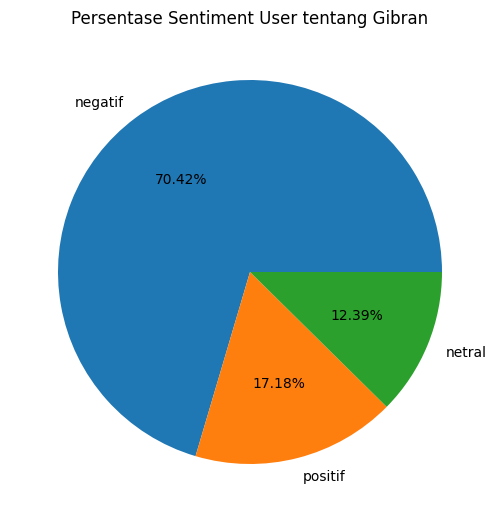

In [44]:
diagram = data['sentimen'].value_counts().rename_axis('nilai_sentimen').reset_index(name='jumlah')
label = diagram.nilai_sentimen
nilai = diagram.jumlah

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis = ('equal')


ax.pie(nilai, labels = label, autopct='%1.2f%%' )
ax.set_title("Persentase Sentiment User tentang Gibran")

In [41]:
from wordcloud import WordCloud

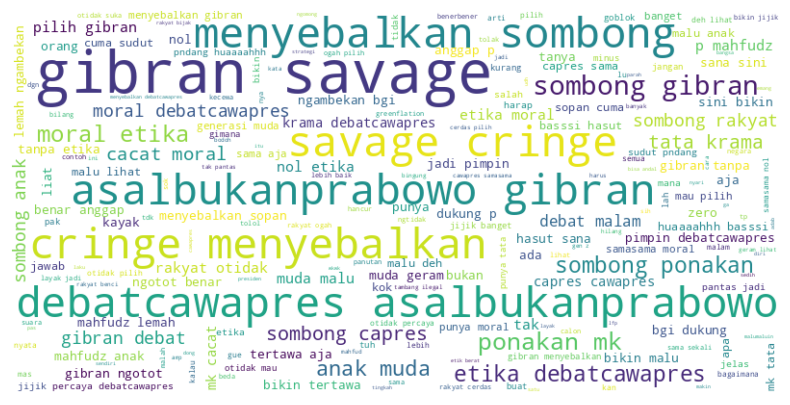

In [43]:
teks_negatif = data[data['sentimen'] == 'negatif']['full_text'].str.cat(sep=' ')

# Membuat objek WordCloud
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white').generate(teks_negatif)

# Menampilkan word cloud menggunakan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.show()